In [13]:
#Завдання 1
#Прочитайте CSV файл (використовуйте метод read_csv):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Global YouTube Statistics.csv",encoding="latin-1") #довелось зазначити кодування тому що pandas не міг прочитати файл


In [3]:
#Завдання 2
#Виведіть перші п'ять рядків (використовується метод head): 
data.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
#Завдання 3
#Виведіть розміри датасету (використовуйте метод shape): 
print(data.shape)

(995, 28)


In [5]:
#Завдання 4
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum). 
print('Пропущені значення: ', data.isna().sum())


Пропущені значення:  rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                          

In [7]:
# Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.
data.replace(' ', pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
print(data.isna().sum())

rank                                         0
Youtuber                                   995
subscribers                                  0
video views                                  0
category                                   995
Title                                      995
uploads                                      0
Country                                    995
Abbreviation                               995
channel_type                               995
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                              995
created_date 

In [8]:
# 5 Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float. 
data.fillna(data.mean(), inplace=True)
data = data.astype(float)

In [10]:
# 6 Ще раз перевірте кількість пропусків.
data.isna().sum()

rank                                         0
Youtuber                                   995
subscribers                                  0
video views                                  0
category                                   995
Title                                      995
uploads                                      0
Country                                    995
Abbreviation                               995
channel_type                               995
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                              995
created_date 

In [11]:
# 7 Перевірте, скільки унікальних країн представлено у колонці "Country" 
countries = data['Country'].nunique()
print(countries)

0


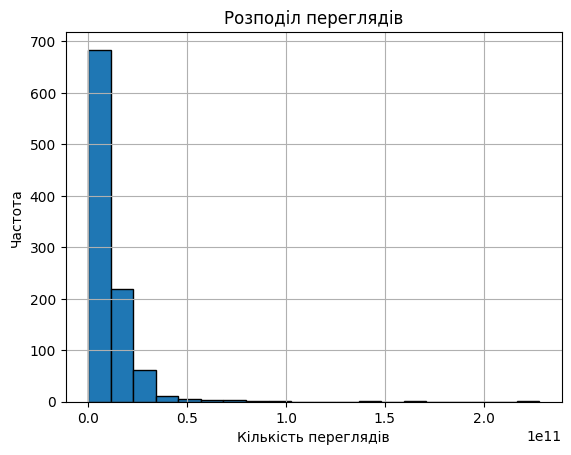

In [14]:
# 8 Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
data['video views'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Кількість переглядів')
plt.ylabel('Частота')
plt.title('Розподіл переглядів')
plt.grid(True)
plt.show()

In [15]:
# 9 Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean) 
print(data['video views'].max())
print(data['video views'].min())
print(data['video views'].mean())

228000000000.0
0.0
11039537052.03819


In [16]:
# 10 Знайдіть країну, де найбільше відео було завантажено на YouTube 
country = data.at[data['uploads'].idxmax(), 'Country']
print(country)

India


In [17]:
# 11 
video1 = data.at[data['uploads'].idxmax(), 'Title']
video2 = data.at[data['uploads'].idxmin(), 'Title']
print("Найбільша к-сть завантажень:", video1 )
print("Найменша к-сть завантажень:", video2 )

Найбільша к-сть завантажень: ABP NEWS
Найменша к-сть завантажень: Music


In [19]:
# 1 Прочитайте CSV файл (метод read_csv):
df = pd. read_csv('bestsellers with categories.csv')

In [20]:
# 2  Виведіть перші 10 рядків ( метод head):
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [21]:
# 3 Виведіть розміри датасету (метод shape) 
print(df.shape)
print("Кількість книг у датасеті:", df.shape[0])

(550, 7)
Кількість книг у датасеті: 550


In [22]:
# 4 Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення. 
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [23]:
# 5 Вивести кількість пропусків у кожному стовпчику
print(df.isna().sum())
skip = df.isna().any().any()
print("Чи є в якихось змінних пропуски?", "Так" if skip else "Ні")

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Чи є в якихось змінних пропуски? Ні


In [24]:
# 6 За допомогою методу unique  перевірте. Які є унікальні жанри в стовпці genre  
print("Унікальні жанри:")
print(df['genre'].unique())

Унікальні жанри:
['Non Fiction' 'Fiction']


In [25]:
# 7 Визначте максимальну, мінімальну, медіанну ціну за допомогою методів  max, min, mean, median 
print("Максимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [31]:
# 8 Виконайте наступні завдання з пошуку і сортування даних 
question1 = df['user_rating'].max()
print("1. Який рейтинг у датасеті найвищий?", question1)
question2 = (df['user_rating'] == rating).sum()
print("2. Скільки книг мають такий рейтинг?", question2)
question3 =df.at[df['reviews'].idxmax(), 'name']
print("3. Яка книга має найбільше відгуків? :", question3)
question4 = df[(df['year'] == 2010) & (df['user_rating'] <= 50)].nlargest(1, 'price')
print("4. З тих книг, що потрапили до Топ-50 у 2010 році, яка книга найдорожча ?", question4['name'].values[0])
question5 = ((df['year'] == 2012) & (df['genre'] == 'Fiction') & (df['user_rating'] <= 50)).sum()
print("5. Скільки книг жанру Fiction потрапили до Топ-50 у 2012 році ? ", question5)
question6 = ((df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))).sum()
print("6. Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках ?", question6 )

1. Який рейтинг у датасеті найвищий? 4.9


NameError: name 'rating' is not defined

In [32]:
# 9 Вивести максимальну і  мінімальну ціну для жанру Fiction I NonFiction (за допомогою методів  groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
print(df.groupby('genre').agg({'price': ['max', 'min']}))

            price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0
